In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from scipy.stats import norm
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn import tree
from cf_matrix import make_confusion_matrix
import pydot

In [2]:
dia_df = pd.read_csv('diabetes_data_upload.csv')
dia_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
for col in dia_df:
    print(dia_df[col].unique())

[40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
['Male' 'Female']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Positive' 'Negative']


In [5]:
dia_df['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [6]:
320/500

0.64

<AxesSubplot:>

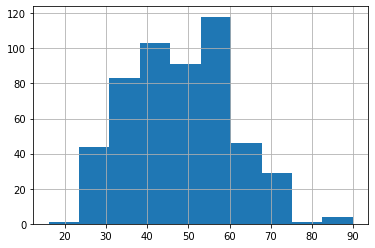

In [7]:
dia_df.Age.hist()

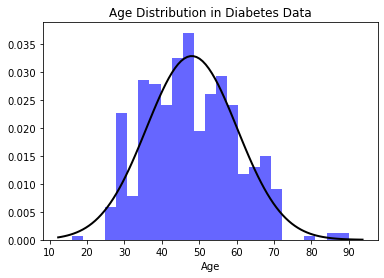

In [8]:
mu, std = norm.fit(dia_df.Age)
plt.hist(dia_df.Age, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Age Distribution in Diabetes Data')
plt.xlabel('Age')
plt.show()

In [9]:
dia_df['Age Zscore'] = stats.zscore(dia_df['Age'])

In [10]:
# column_list = ['Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia', 'Obesity']

In [11]:
dia_df2 = dia_df.replace(['Yes', 'No', 'Male', 'Female', 'Positive', 'Negative'], [1, 0, 1, 0, 1, 0])

In [12]:
dia_df2 = dia_df2.drop('Age', 1)

In [13]:
dia_df2

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age Zscore
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,-0.661367
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0.821362
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,-0.578993
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,-0.249498
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0.986110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,-0.743741
516,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,-0.002376
517,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,0.821362
518,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,-1.320358


In [14]:
X = dia_df2.drop('class',axis=1)
y = dia_df2[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [15]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=15, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, random_state=42)

In [16]:
y_predict = clf_model.predict(X_test)

In [17]:
accuracy_score(y_test,y_predict)

0.9326923076923077

In [18]:
target = list(dia_df2['class'].unique())
feature_names = list(X.columns)

In [19]:
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- Polyuria <= 0.50
|   |--- Gender <= 0.50
|   |   |--- Alopecia <= 0.50
|   |   |   |--- Age Zscore <= -1.11
|   |   |   |   |--- class: 0
|   |   |   |--- Age Zscore >  -1.11
|   |   |   |   |--- Irritability <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Irritability >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- Alopecia >  0.50
|   |   |   |--- Age Zscore <= 0.74
|   |   |   |   |--- class: 0
|   |   |   |--- Age Zscore >  0.74
|   |   |   |   |--- class: 0
|   |--- Gender >  0.50
|   |   |--- Polydipsia <= 0.50
|   |   |   |--- Irritability <= 0.50
|   |   |   |   |--- weakness <= 0.50
|   |   |   |   |   |--- Age Zscore <= 0.78
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age Zscore >  0.78
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- weakness >  0.50
|   |   |   |   |   |--- Age Zscore <= -0.66
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age Zscore >  -0.66
|   |   |   |   |   |   |--- Alopecia <= 0.5

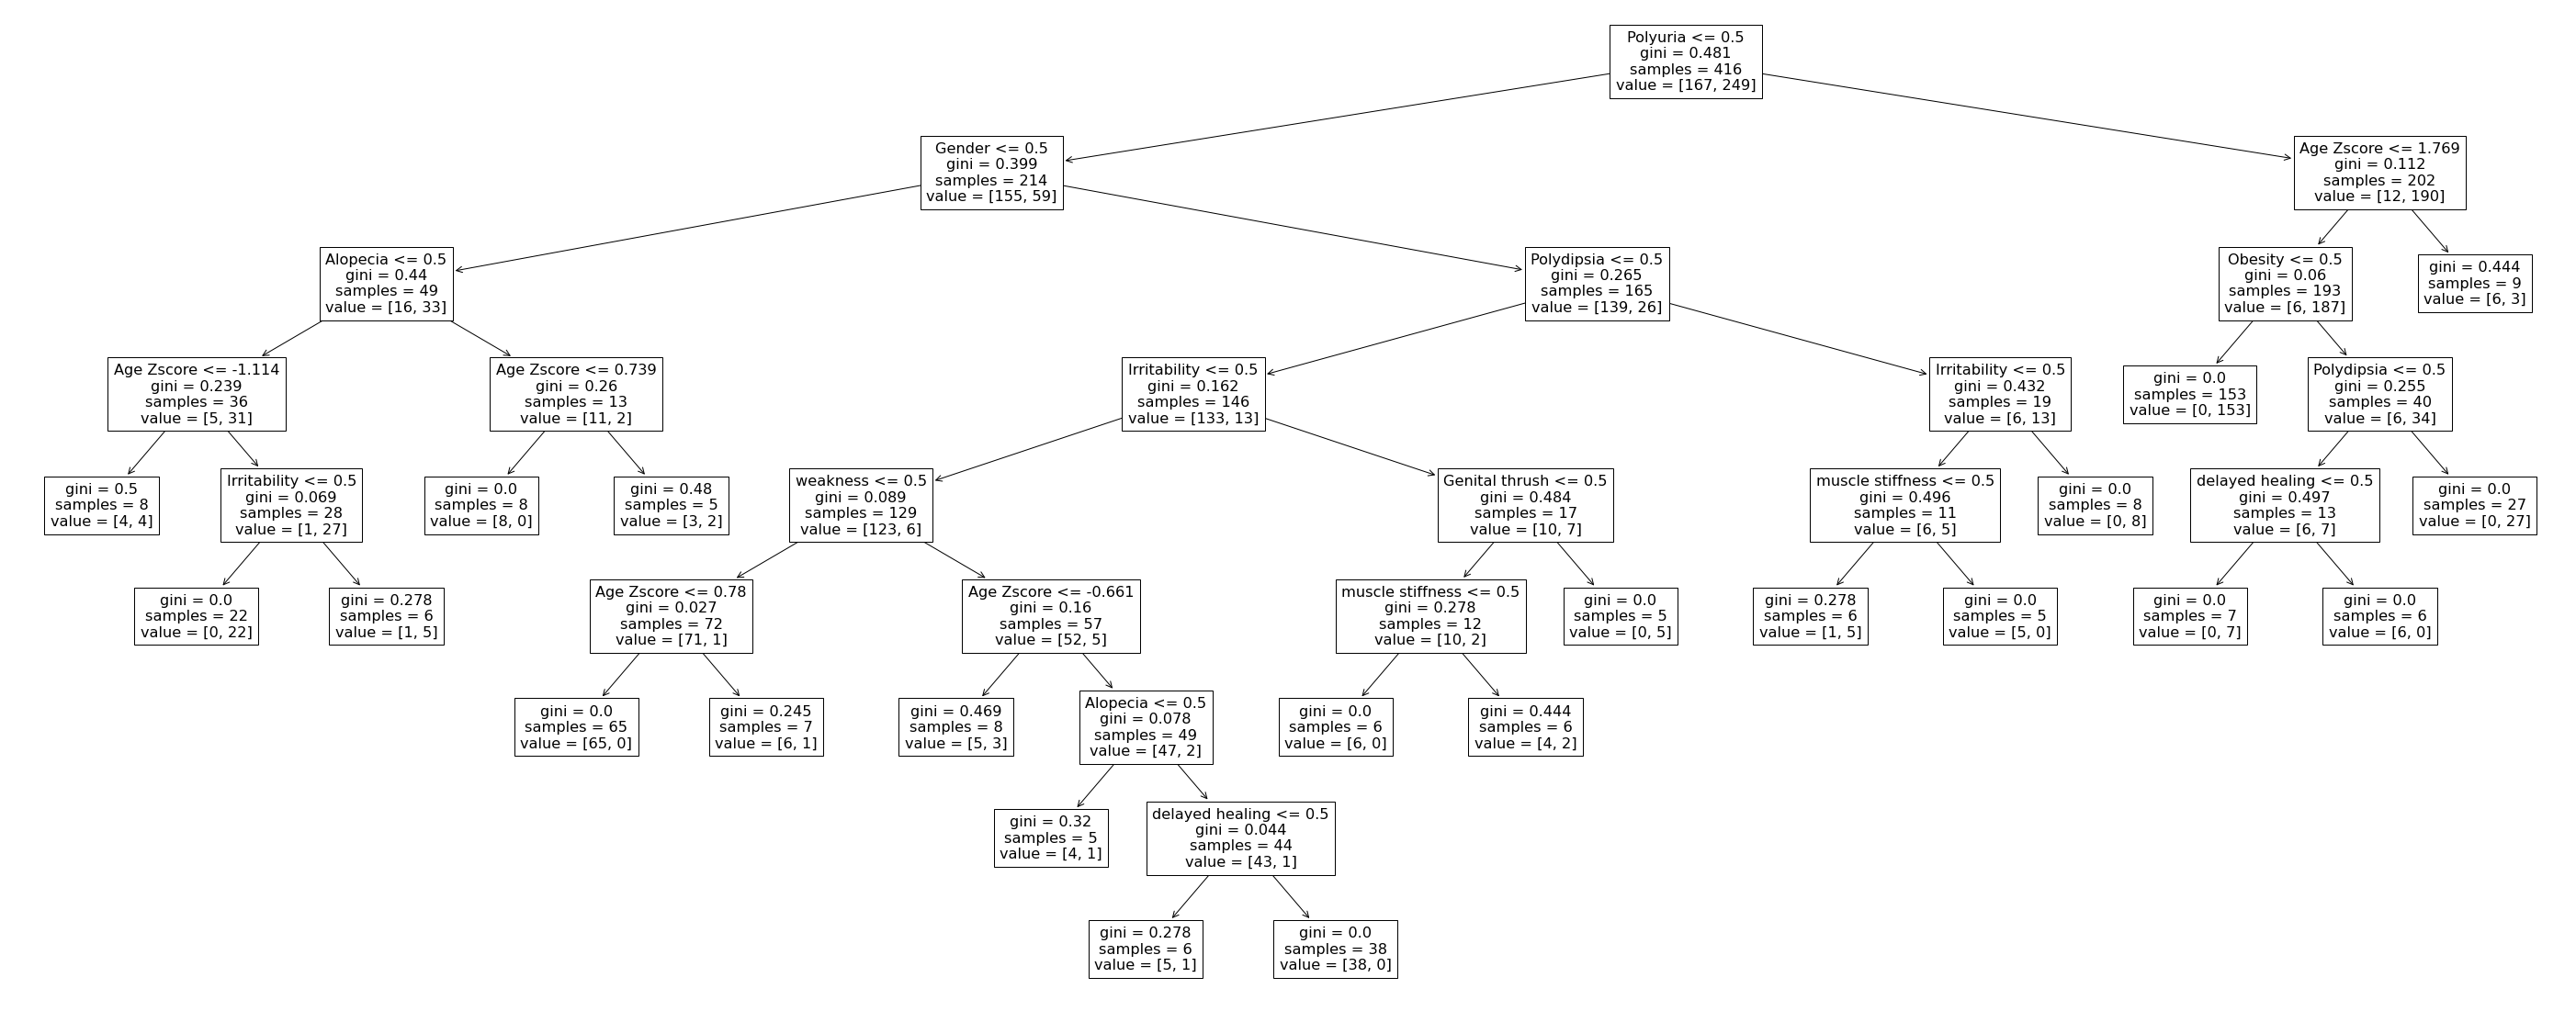

In [26]:
plt.figure(figsize=(50,20))
tree.plot_tree(clf_model.fit(X_train, y_train),feature_names=feature_names)
plt.savefig('tree.png')

In [21]:
cm = confusion_matrix(y_test, y_predict)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[33  0]
 [ 7 64]]


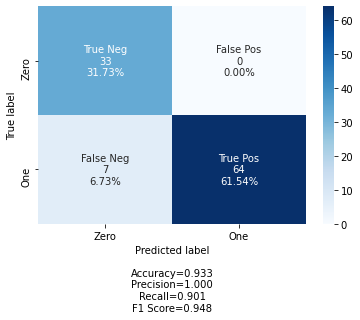

In [27]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero','One']
make_confusion_matrix(cm,group_names=labels,categories=categories,cmap='Blues')
plt.savefig('cm.png')

In [28]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [31]:
importances

,feature,importance
1,Polyuria,0.526
0,Gender,0.115
2,Polydipsia,0.090
15,Age Zscore,0.071
13,Alopecia,0.056
9,Irritability,0.040
10,delayed healing,0.039
6,Genital thrush,0.028
12,muscle stiffness,0.025
14,Obesity,0.008
